In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
np.random.seed(2)

# Generate random samples that satisfy a linear regression
X = np.random.rand(1000,1)
y = 4 + 3*X + .2 * np.random.randn(1000,1)

# Building Xbar
Xbar = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)

# Find weight using formular
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)

# Cost function 
def cost(w):
    return .5/Xbar.shape[0] * np.linalg.norm(y - Xbar.dot(w), 2)**2

# Gradient
def grad(w):
    return 1/Xbar.shape[0] * Xbar.T.dot(Xbar.dot(w) - y)

In [5]:
# NAG
def GD_NAG(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma * v[-1] + eta*grad(w[-1] - gamma*v[-1])
        w_new = w[-1] - v_new
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)

w_init = np.array([[2], [1]])

In [6]:
N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


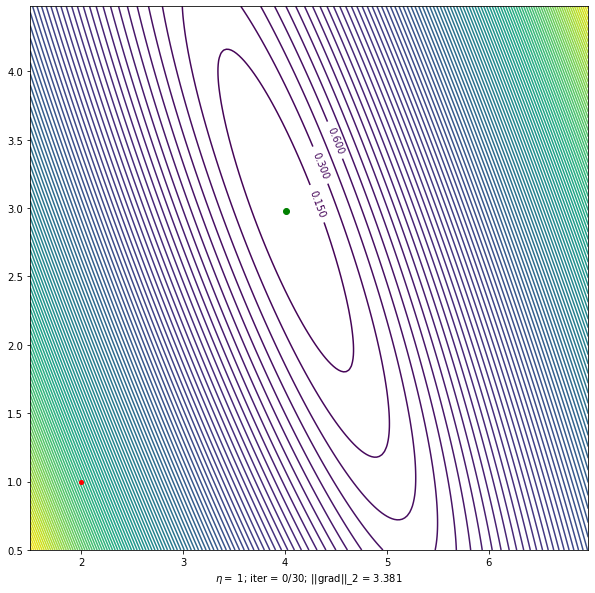

In [8]:
# Visualize result
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def save_gif2(eta, gamma):
    (w, it) = GD_NAG(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(10,10))    
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
            animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4) 
            xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
            xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
            ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)

    fn = 'LR_NAG_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

eta = 1 
gamma = .9
save_gif2(eta, gamma)